## Exercici
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la **moda**, la **mediana**, la **desviació estàndard** i la **mitjana aritmètica**. 

*Per fer l'exercici agafem un dataset de les estadístiques per lligues de futbol que hi han a [bet365](https://www.football-data.co.uk/englandm.php). En el nostre cas, agafarem les dades de la premier league anglesa, temporada 2019-2020.*

In [32]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

In [33]:
#importem el dataset
pd.options.display.max_columns = None
datasets_path = r"D:\Oscar\FORMACIO\DIGITAL\DATA SCIENCE with Python\Datasets\football stats" + os.sep
file = "2019-2020 premier league.csv"
df = pd.read_csv(datasets_path + file, sep=',', encoding='utf8')
df.sample(3)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
104,E0,02/11/2019,15:00,Man City,Southampton,2,1,H,0,1,A,L Mason,26,3,4,3,11,10,17,0,3,1,0,0,1.07,13.00,23.0,1.09,11.0,23.00,1.08,11.00,27.00,1.08,13.13,33.77,1.06,12.0,36.00,1.07,12.0,41.0,1.11,13.50,41.00,1.08,11.99,29.72,1.22,4.33,1.21,4.86,1.25,4.86,1.22,4.27,-3.00,2.00,1.80,2.09,1.83,2.12,1.88,2.07,1.81,1.07,13.00,23.00,1.07,13.0,31.00,1.10,9.1,28.0,1.07,14.49,36.78,1.06,13.0,34.00,1.05,13.0,34.0,1.10,15.00,38.00,1.07,12.93,31.81,1.22,4.33,1.19,5.20,1.22,5.20,1.20,4.48,-3.00,1.96,1.97,1.96,1.96,2.25,1.99,1.97,1.91
322,E0,04/07/2020,15:00,Man United,Bournemouth,5,2,H,3,1,H,M Dean,19,7,10,3,13,12,8,3,0,1,0,0,1.16,7.50,17.0,1.17,7.0,18.00,1.18,7.10,16.00,1.17,7.66,18.70,1.15,7.5,19.00,1.17,7.5,20.0,1.19,8.30,21.00,1.17,7.46,17.41,1.53,2.50,1.53,2.62,1.59,2.71,1.53,2.54,-2.00,1.92,1.98,1.93,1.98,1.99,2.02,1.92,1.96,1.18,7.50,13.00,1.18,7.5,14.50,1.22,6.2,13.5,1.19,7.81,16.00,1.17,7.5,17.00,1.20,7.0,17.0,1.22,8.20,19.50,1.19,7.30,15.59,1.53,2.50,1.54,2.61,1.61,2.63,1.55,2.48,-1.75,1.82,2.08,1.81,2.11,1.85,2.16,1.80,2.09
120,E0,23/11/2019,12:30,West Ham,Tottenham,2,3,A,0,2,A,M Oliver,11,15,4,6,12,14,3,7,3,2,0,0,4.20,4.33,1.7,4.33,4.0,1.75,4.30,4.05,1.75,4.37,4.32,1.76,4.20,4.2,1.75,4.40,3.9,1.8,4.45,4.36,1.82,4.32,4.14,1.75,1.53,2.50,1.58,2.54,1.60,2.58,1.55,2.47,0.75,1.94,1.96,1.94,1.99,1.97,1.99,1.93,1.95,4.50,4.33,1.66,4.75,4.4,1.67,5.00,3.8,1.7,4.71,4.53,1.69,4.80,4.4,1.67,4.80,4.1,1.7,5.00,4.57,1.72,4.74,4.34,1.67,1.57,2.37,1.59,2.51,1.62,2.55,1.56,2.45,1.00,1.75,2.05,1.80,2.15,1.81,2.20,1.77,2.13


*Ens donen també [l'enllaç d'informació les columnes](https://www.football-data.co.uk/notes.txt)*

Columnes que tindrem en compte per l'estudi:
- HomeTeam = Home Team
- AwayTeam = Away Team
- FTHG and HG = Full Time Home Team Goals
- FTAG and AG = Full Time Away Team Goals
- FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)

Match Statistics (where available)
- HS = Home Team Shots
- AS = Away Team Shots
- HST = Home Team Shots on Target
- AST = Away Team Shots on Target
- HC = Home Team Corners
- AC = Away Team Corners
- HF = Home Team Fouls Committed
- AF = Away Team Fouls Committed
- HY = Home Team Yellow Cards
- AY = Away Team Yellow Cards
- HR = Home Team Red Cards
- AR = Away Team Red Cards

*Volem obtindre l'estadística d'una serie de variables. Però com el dataset ens ve per partits i amb les dades dels dos equips que hi juguen, aquestes dades venen dividides entre dades de visitants i locals. Tenim dues informacions per fila. 
Haurem d'organitzar aquesta informació per equips per poder veure cadascuna de les dades en qüestió en una sola columna per fila.

*Farem una funció que ens tregui les dades que ens interessa estudiar d'un equip en concret (depenent de si juga com a visitant o com a local haurem d'agafar unes columnes o unes altres) i també afegirem una columna booleana "LOCAL" per no perde aquesta informació per si volguéssim, en un futur, testejar per aquesta característica*

*Posteriorment concatejarem tots els equips en un nou dataframe on podrem evaluar les estadistiques i relacions entre variables*

In [34]:
#definirem una funció que donat un equip pel nostre dataset ems retorni un dataframe amb la informació unificada 
#per l'equip en concret
def df_de_dades_x_team(team, df=df):
    new_cols = ["TEAM", "RIVAL", "GOLS_FAVOR", "GOLS_CONTRA", "RESULTAT", "XUTS", "XUTS_REBUTS", 
                "XUTS_PORTA", "XUTS_PORTA_REBUTS", "CORNERS_LLENÇATS", "CORNERS_REBUTS", 
                "FALTES_COMESES", "FALTES_REBUDES", "TARGETES", "EXPULSIONS"]
    
    #partits de local
    old_cols = ["HomeTeam", "AwayTeam", "FTHG", "FTAG", "FTR", "HS", "AS", "HST", "AST", "HC", "AC", "HF", "AF", "HY", "HR"]    
    local_team_df = df[(df.HomeTeam == team)]
    rename = dict(zip(old_cols, new_cols))
    local_team_df = local_team_df.rename(columns=rename)[new_cols]
    #Mapegem la columna de RESULTAT considerant que es local 
    resultat_dic = {"H": "Win", "D": "Draw", "A": "Lose"}
    local_team_df.RESULTAT = local_team_df.RESULTAT.map(resultat_dic)
    
    #partits de visitant
    old_cols = ["AwayTeam", "HomeTeam", "FTAG", "FTHG", "FTR", "AS", "HS", "AST", "HST", "AC", "HC", "AF", "HF", "AY", "AR"]
    away_team_df = df[df.AwayTeam == team]
    rename = dict(zip(old_cols, new_cols))
    away_team_df = away_team_df.rename(columns=rename)[new_cols]
    #Mapegem la columna de RESULTAT considerant que es visitant 
    resultat_dic = {"H": "Lose", "D": "Draw", "A": "Win"}
    away_team_df.RESULTAT = away_team_df.RESULTAT.map(resultat_dic)
    
    #afegim una columna booleana per especificicar si juga de local o visitant
    local_team_df["LOCAL"] = True
    away_team_df["LOCAL"] = False
    
    #finamlment retornem els dos dataframes concatenats
    return local_team_df.append(away_team_df)

In [35]:
#tenim tots aquests equips al dataset
df.HomeTeam.unique()

array(['Liverpool', 'West Ham', 'Bournemouth', 'Burnley',
       'Crystal Palace', 'Watford', 'Tottenham', 'Leicester', 'Newcastle',
       'Man United', 'Arsenal', 'Aston Villa', 'Brighton', 'Everton',
       'Norwich', 'Southampton', 'Man City', 'Sheffield United',
       'Chelsea', 'Wolves'], dtype=object)

In [36]:
#de manera que si cridem a la funció passant com a paràmetre l'equip en concret, ens retorna les dades unificades de l'equip,
#i partit
df_de_dades_x_team("Man City").head()

,TEAM,RIVAL,GOLS_FAVOR,GOLS_CONTRA,RESULTAT,XUTS,XUTS_REBUTS,XUTS_PORTA,XUTS_PORTA_REBUTS,CORNERS_LLENÇATS,CORNERS_REBUTS,FALTES_COMESES,FALTES_REBUDES,TARGETES,EXPULSIONS,LOCAL
16,Man City,Tottenham,2,2,Draw,30,3,10,2,13,2,14,4,1,0,True
34,Man City,Brighton,4,0,Win,15,6,6,2,8,1,10,6,1,0,True
54,Man City,Watford,8,0,Win,28,5,11,4,5,4,5,9,2,0,True
77,Man City,Wolves,0,2,Lose,18,7,2,2,9,1,11,14,5,0,True
91,Man City,Aston Villa,3,0,Win,25,11,9,5,13,7,10,5,1,1,True


In [37]:
#fem un nou dataframe amb aquestes dades per tots els equips
teams_data_df = pd.DataFrame()
for team in df.HomeTeam.unique():
    team_data_df = df_de_dades_x_team(team)
    teams_data_df = teams_data_df.append(team_data_df)
teams_data_df

,TEAM,RIVAL,GOLS_FAVOR,GOLS_CONTRA,RESULTAT,XUTS,XUTS_REBUTS,XUTS_PORTA,XUTS_PORTA_REBUTS,CORNERS_LLENÇATS,CORNERS_REBUTS,FALTES_COMESES,FALTES_REBUDES,TARGETES,EXPULSIONS,LOCAL
0,Liverpool,Norwich,4,1,Win,15,12,7,5,11,2,9,9,0,0,True
26,Liverpool,Arsenal,3,1,Win,25,9,5,3,6,4,8,5,1,0,True
40,Liverpool,Newcastle,3,1,Win,21,8,9,1,10,1,5,4,0,0,True
72,Liverpool,Leicester,2,1,Win,18,2,8,1,4,6,9,17,1,0,True
98,Liverpool,Tottenham,2,1,Win,21,11,13,4,8,3,9,11,3,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,Wolves,West Ham,2,0,Win,10,7,6,2,7,5,7,8,1,0,False
310,Wolves,Aston Villa,1,0,Win,9,11,2,1,2,2,16,16,1,0,False
334,Wolves,Sheffield United,0,1,Lose,6,7,1,3,1,6,6,5,0,0,False
351,Wolves,Burnley,1,1,Draw,14,9,5,1,8,3,8,10,0,0,False


### Moda

In [38]:
#definim funció que ens retorna en una llista la moda o modes (llista d'un element si és unimodal, o de més d'un si és
#multimodal)
def moda(series):
    moda, moda_counts = [], None
    for value, counts in series.value_counts().iteritems():
        if (not moda) | (counts == moda_counts):
            moda_counts = counts
            moda.append(value)
        else: break
    return moda

#passem a la funció la columna de xuts a porta. Veiem que és bimodal
moda(teams_data_df.XUTS_PORTA)

[2, 3]

In [39]:
#amb el mètode mode de pandas
teams_data_df.XUTS_PORTA.mode().values

array([2, 3], dtype=int64)

### Mediana

In [40]:
def mediana(series):
    meitat = int(len(series) / 2)
    if len(series) % 2 == 0:
        return (series.sort_values().iat[meitat-1] + series.sort_values().iat[meitat]) / 2
    else: return series.sort_values().iat[meitat]

#calculem amb la funció
mediana(teams_data_df.XUTS_PORTA)

4.0

In [41]:
#amb pandas
teams_data_df.XUTS_PORTA.median()

4.0

### Mitjana aritmètica

In [42]:
#definim funció que ens retorna la mitjana aritmètica d'una series
def mitjana(series):
    return series.sum() / len(series)

#passem l'atribut "xuts a porta"
mitjana(teams_data_df.XUTS_PORTA)

4.275

In [43]:
#amb mean de pandas
teams_data_df.XUTS_PORTA.mean()

4.275

### Desviació Estàndard

In [44]:
import math

#definim una funció, segons la fórmula, que ens retorna la desviació estàndard
def desviacio_estandar(series):
    p = mitjana(series)
    numerador = 0
    for v in series.tolist(): numerador += (v - p) **2
    varianca = numerador / (len(series))
    return math.sqrt(varianca)

#passem l'atribut a la funció
desviacio_estandar(teams_data_df.XUTS_PORTA)

2.5171843606027693

In [45]:
#amb std de pandas veiem que surt un valor una mica diferent a partir del 3er decimal. (Sembla que aplica la correcció de 
#Bessel, que s'aplica per reduïr el biaix quan es tracta amb mostres, on en comptes de dividir pel nombre d'elements totals
#ho fa per n-1)
teams_data_df.XUTS_PORTA.std()

2.518842038991589

In [46]:
#si fem la funció amb n-1 veiem que coincideix amb pandas
def desviacio_estandar(series):
    p = mitjana(series)
    numerador = 0
    for v in series.tolist(): numerador += (v - p) **2
    varianca = numerador / (len(series) - 1)
    return math.sqrt(varianca)
desviacio_estandar(teams_data_df.XUTS_PORTA)

2.5188420389915915

In [47]:
#si provem amb la desviació estàndard de numpy veiem que coincideix amb la fórmula sense aplicar la correcció de Bessel
np.std(teams_data_df.XUTS_PORTA.values)

2.517184360602766

## Exercici
Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva **correlació**. 

In [48]:
#definim una funció que ens calcula el coeficient de correlació entre dues series. Utilitzarem una nova funció per calcular
#la covariança i tb les funcions definides anteriorment
def covarianca(series1, series2):
    p1 = mitjana(series1)
    p2 = mitjana(series2)
    numerador = 0
    for v1, v2 in np.nditer([series1.values, series2.values]):
        numerador += (v1 - p1) * (v2 - p2)
    return numerador / (len(series1))

def coeficient_correlacio(series1, series2):
    return covarianca(series1, series2) / (desviacio_estandar(series1) * desviacio_estandar(series2))

#calculem el coeficient de correlació entre els xuts a porta i els gols a favor, per veure si hi ha relacío lineal entre elles
coeficient_correlacio(teams_data_df.XUTS_PORTA, teams_data_df.GOLS_FAVOR)

0.6252480908507959

In [49]:
#amb pandas coincideixen i observem que tot i que sembla que tenen una mica de relació lineal, no és tanta com ens podriem
#pensar a priori
teams_data_df[["XUTS_PORTA", "GOLS_FAVOR"]].corr(method='pearson')

,XUTS_PORTA,GOLS_FAVOR
XUTS_PORTA,1.000000,0.626072
GOLS_FAVOR,0.626072,1.000000


In [50]:
#amb numpy igual
np.corrcoef([teams_data_df.XUTS_PORTA.values, teams_data_df.GOLS_FAVOR.values])

array([[1.        , 0.62607187],
       [0.62607187, 1.        ]])

## Exercici 
Continuant amb les dades de tema esportiu, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.

In [51]:
cols = ["GOLS_FAVOR", "GOLS_CONTRA", "XUTS", "XUTS_REBUTS", "XUTS_PORTA", "XUTS_PORTA_REBUTS", 
        "CORNERS_LLENÇATS", "CORNERS_REBUTS", "FALTES_COMESES", "FALTES_REBUDES", "TARGETES", "EXPULSIONS"]
data = teams_data_df[cols].corr(method='pearson')
data

,GOLS_FAVOR,GOLS_CONTRA,XUTS,XUTS_REBUTS,XUTS_PORTA,XUTS_PORTA_REBUTS,CORNERS_LLENÇATS,CORNERS_REBUTS,FALTES_COMESES,FALTES_REBUDES,TARGETES,EXPULSIONS
GOLS_FAVOR,1.000000,-0.249983,0.385781,-0.197071,0.626072,-0.215531,0.077629,-0.152767,0.014372,-0.117409,-0.106874,-0.093781
GOLS_CONTRA,-0.249983,1.000000,-0.197071,0.385781,-0.215531,0.626072,-0.152767,0.077629,-0.117409,0.014372,-0.053138,0.056454
XUTS,0.385781,-0.197071,1.000000,-0.435492,0.700501,-0.304934,0.558217,-0.334371,0.008677,-0.056106,-0.077136,-0.074714
XUTS_REBUTS,-0.197071,0.385781,-0.435492,1.000000,-0.304934,0.700501,-0.334371,0.558217,-0.056106,0.008677,0.092727,0.067105
XUTS_PORTA,0.626072,-0.215531,0.700501,-0.304934,1.000000,-0.264867,0.313284,-0.207859,0.017292,-0.063997,-0.110095,-0.089545
XUTS_PORTA_REBUTS,-0.215531,0.626072,-0.304934,0.700501,-0.264867,1.000000,-0.207859,0.313284,-0.063997,0.017292,0.035934,0.139863
CORNERS_LLENÇATS,0.077629,-0.152767,0.558217,-0.334371,0.313284,-0.207859,1.000000,-0.219963,0.022104,-0.030568,0.002358,-0.047877
CORNERS_REBUTS,-0.152767,0.077629,-0.334371,0.558217,-0.207859,0.313284,-0.219963,1.000000,-0.030568,0.022104,0.085194,0.043001
FALTES_COMESES,0.014372,-0.117409,0.008677,-0.056106,0.017292,-0.063997,0.022104,-0.030568,1.000000,0.159761,0.365782,0.011962
FALTES_REBUDES,-0.117409,0.014372,-0.056106,0.008677,-0.063997,0.017292,-0.030568,0.022104,0.159761,1.000000,0.069129,0.061182


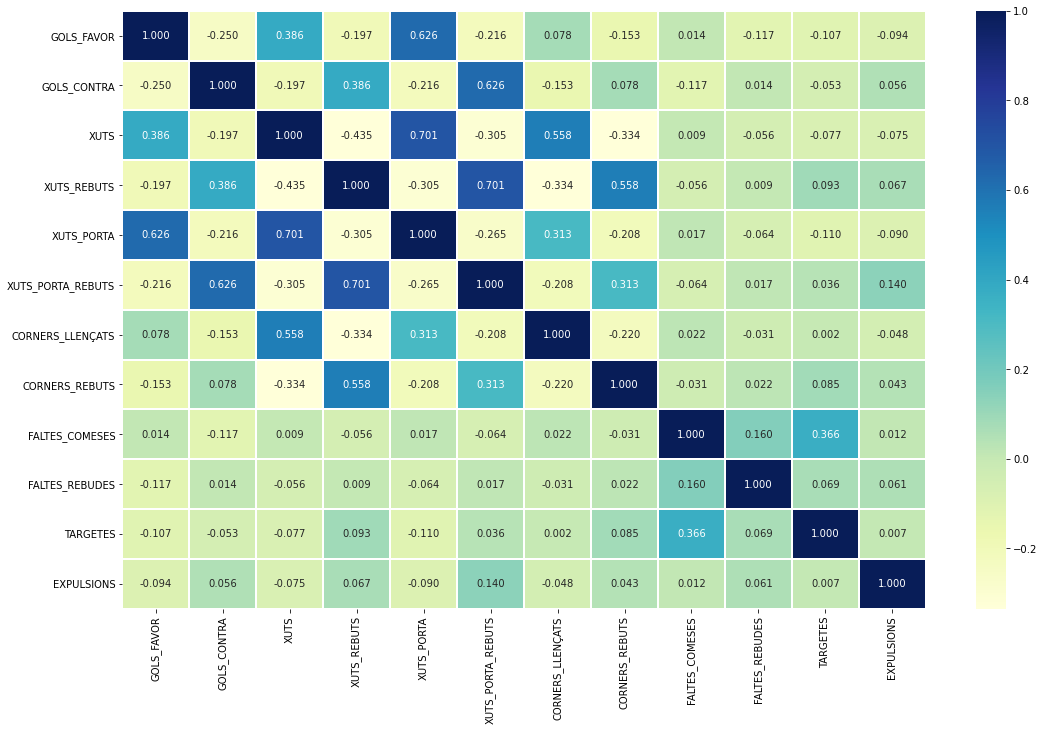

In [52]:
#visualitzem la matriu de colors
plt.figure(figsize =(18, 11))
sns.heatmap(data, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", fmt='.3f', 
            robust=True, linewidths=1, linecolor="w")
plt.show()

Observem que les relacions lineals més elevades es donen entre xuts a porta i xuts, tb entre gols i xuts (que hem calculat anteriorment), veiem una mica de relació entre corners i xuts, i una petita relació tb entre les faltes comeses i les targetes rebudes

## Exercici
Continuant amb les dades de tema esportiu, selecciona un atribut i calcula la **mitjana geomètrica** i la **mitjana harmònica**.

*Com no té gaire sentit calcular aquestes mitjanes pel nostre exemple, doncs son valors propers entre ells, petits, i molts d'ells zero amb el que no podriem calcularles.*

*Agafarem un altre dataset de [Kaggle](https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020?select=lap_times.csv) de la marató de Boston del 2017, i mirarem els temps oficials.*

In [53]:
#importem el dataset
pd.options.display.max_columns = None
datasets_path = r"D:\Oscar\FORMACIO\DIGITAL\DATA SCIENCE with Python\Datasets" + os.sep
file = "marathon_results_2017.csv"
df = pd.read_csv(datasets_path + file, sep=',', encoding='utf8')
df.sample(3)

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
9240,9240,14474,"Bauman, Sheridan H",46,F,Westbrook,CT,USA,NaN,NaN,0:23:53,0:47:59,1:11:56,1:37:50,1:43:12,2:03:44,2:31:08,3:00:25,3:27:25,0:08:20,-,3:38:11,9242,2475,202
2440,2440,2640,"Willett, Kyle",33,M,Seattle,WA,USA,NaN,NaN,0:20:42,0:41:28,1:03:03,1:24:47,1:29:27,1:46:24,2:09:15,2:33:14,2:57:23,0:07:10,-,3:07:54,2441,2237,1531
11860,11860,17806,"Yao, Jingjing",51,F,Vernon Hills,IL,USA,CHN,NaN,0:24:31,0:48:38,1:13:54,1:40:07,1:45:40,2:06:25,2:35:27,3:05:32,3:34:53,0:08:41,-,3:47:17,11862,3810,147


In [54]:
#tenim la columna amb els temps oficials, la passem a segons i desem en una Series
temps_s = pd.to_timedelta(df["Official Time"]).dt.total_seconds()
temps_s

0         7777.0
1         7798.0
2         7828.0
3         7928.0
4         7955.0
          ...   
26405    25779.0
26406    26219.0
26407    26377.0
26408    26444.0
26409    28694.0
Name: Official Time, Length: 26410, dtype: float64

### Mitjana geomètrica
segons la fórmula calculem la mitjana geomètrica
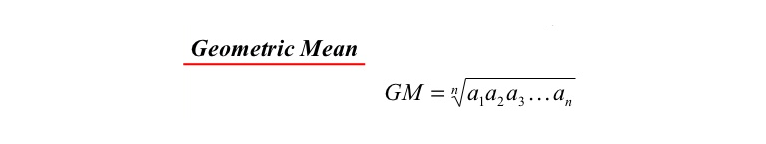

In [55]:
from functools import reduce

#generem la funció segons la fórmula
def geometric_mean(series):
    return reduce(lambda x, y: x*y, series.values)**(1.0 / len(series))

#ens dona un error d'overflow doncs les multiplicacions sobrepassen el tamany suportat
geometric_mean(temps_s)

<ipython-input-55-652654d45bb1>:5: RuntimeWarning: overflow encountered in double_scalars
  return reduce(lambda x, y: x*y, series.values)**(1.0 / len(series))


inf

In [56]:
#provem amb un altre mètode, amb logaritmes
def geometric_mean(series):
    return np.exp(np.mean(np.log(series.values)))

#obtenim el següent resultat
geometric_mean(temps_s)

14069.775619089636

In [57]:
from scipy import stats

#si provem amb stats de scipy i obtenim el mateix resultat
seconds = stats.gmean(temps_s)
seconds

14069.775619089636

In [58]:
#podem passar aquests segons de nou a str per visualitzar
geometrica = str(datetime.timedelta(seconds=seconds))
geometrica

'3:54:29.775619'

### Mitjana Harmònica

segons la fòrmula:
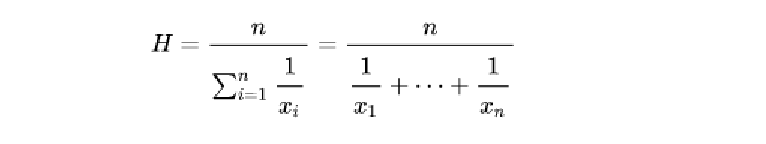

In [59]:
#generem la funció segons la fórmula
def harmonic_mean(series):
    divisor = 0
    for value in series.tolist():
        divisor = divisor + 1 / value
    return len(series) / divisor

harmonic_mean(temps_s)

13864.760457626404

In [60]:
#amb stats de scipy
seconds = stats.hmean(temps_s)
seconds

13864.760457626386

In [61]:
#Visualitzem com string
harmonica = str(datetime.timedelta(seconds=seconds))
harmonica

'3:51:04.760458'

In [62]:
#podem observar que la mitjana aritmètica és la més gran i la harmònica la més petita
str(datetime.timedelta(seconds=temps_s.mean())), geometrica, harmonica

('3:58:03.555358', '3:54:29.775619', '3:51:04.760458')